In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [28]:
for columns in zero_not_accepted:
    df[columns] = df[columns].replace(0, np.NaN) 
    mean = int(df[columns].mean(skipna=True))
    df[columns] = df[columns].replace(np.NaN,mean)

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [30]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [33]:
X.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32


In [34]:
y.head(3)

0    1
1    0
2    1
Name: Outcome, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [40]:
len(X_train)

614

In [41]:
len(X_test)

154

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.7532467532467533

### Transformation

In [45]:
from sklearn.preprocessing import StandardScaler 

In [46]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [47]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.7597402597402597

### Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=2)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7597402597402597

[Text(167.4, 181.2, 'X[1] <= 127.5\ngini = 0.454\nsamples = 768\nvalue = [500, 268]'),
 Text(83.7, 108.72, 'X[7] <= 28.5\ngini = 0.313\nsamples = 485\nvalue = [391, 94]'),
 Text(41.85, 36.23999999999998, 'gini = 0.155\nsamples = 271\nvalue = [248, 23]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.443\nsamples = 214\nvalue = [143, 71]'),
 Text(251.10000000000002, 108.72, 'X[5] <= 29.95\ngini = 0.474\nsamples = 283\nvalue = [109, 174]'),
 Text(209.25, 36.23999999999998, 'gini = 0.435\nsamples = 75\nvalue = [51, 24]'),
 Text(292.95, 36.23999999999998, 'gini = 0.402\nsamples = 208\nvalue = [58, 150]')]

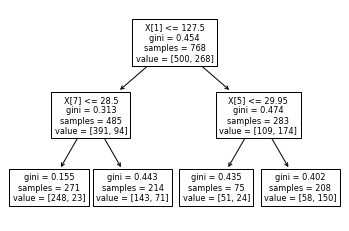